# Caso Práctico 2: Aprendizaje No Supervisado

## Librerías

In [140]:
%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


## Lectura de datos

In [141]:
df = pd.read_csv('clust_ex2.csv')

Cargamos el siguientes datasets de datos, que contienen tres varibles, dos relativas a valores y una variable `y`que contiene cuatro clases.

In [142]:
df.head()

,x1,x2,y
0,8.422981,1.436159,1
1,5.518084,8.325260,0
2,-3.919422,0.722993,3
3,-6.137162,-9.758148,2
4,8.275729,-2.854448,1


Vamos a representar los datos gráficamente diferenciando cada clase dada por la variable `y`.

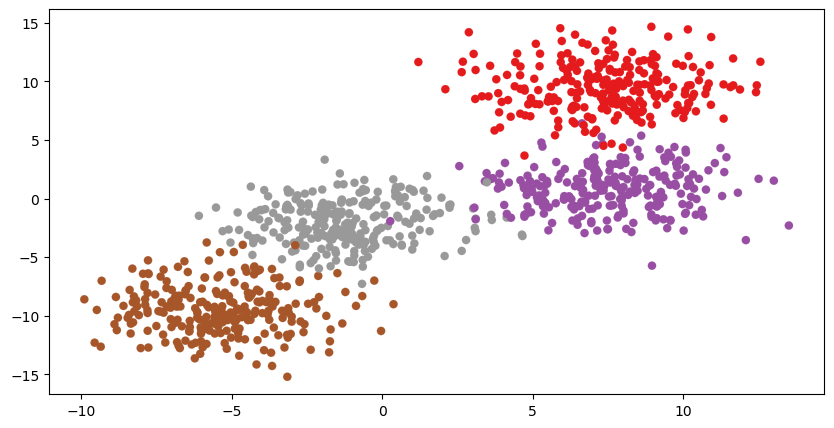

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],c=df['y'],cmap=plt.cm.Set1,linewidths=0.1)
plt.show()

Si no tuviésemos la clase `y` nuestros datos tendrían el siguiente aspecto.

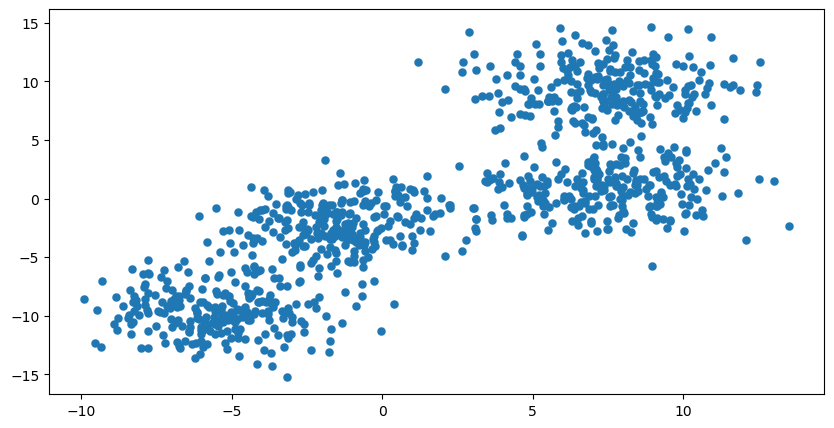

In [144]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],linewidths=0.1)
plt.show()

## Implementación k-Means 

En esta práctica vamos a realizar nuestra propia implementación de k-Means (es decir, sin usar de primeras un algoritmo de ninguna librería) para poder desgranar en detalle su funcionamiento.

El método `cdist` del módulo `scipy` nos permite calcular distancias entre puntos. Veamos un ejemplo el cálculo de la distancia euclídea vista en la lección 4 de esta unidad.

In [145]:
dist = cdist([[0,0], [1,1], [2,2]],[[0,0],[1,0]], 'euclidean')

In [146]:
dist

array([[0.        , 1.        ],
       [1.41421356, 1.        ],
       [2.82842712, 2.23606798]])

In [147]:
#La siguiente línea devuelve el índice por cada fila del valor mínimo de la matriz de distancias
np.argmin(dist, axis=1)

array([0, 1, 1], dtype=int64)

### Implementación

Una vez visto el ejemplo superior, vamos a realizar la implementación de nuestro algoritmo k-Means.

In [148]:
#Elegimos el número de clusters
K = 4

#### 1. Elegimos centroides aleatorios

In [149]:
#Seleccionamos las variables x1 y x2 de nuestro conjunto de datos
features = ['x1', 'x2']
#Escogemos aleatoriamente los centroides iniciales
centroids = df[features].sample(n=K).values

In [150]:
centroids

array([[ 9.96960242, -0.47014454],
       [-4.07678016, -8.85597205],
       [11.81163901,  0.49863715],
       [ 6.39964636,  1.06223051]])

Dibujamos nuestro conjunto de puntos y los centroides aleatorios

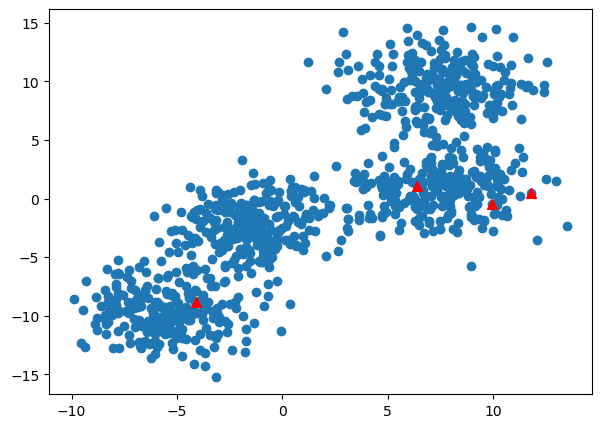

In [151]:
plt.figure(figsize=(7,5))
plt.scatter(df['x1'], df['x2'])
plt.scatter(centroids[:,0], centroids[:,1], marker='^', s=50, color='red')
plt.show()

#### 2. Asignamos cada punto al centroide más cercano

Para esta parte utilizaremos las técnicas vistas en el ejemplo inicial con el método `cdist`y el argumento mínimo que nos devolvía el índice del elemento con menos distancia, a nivel fila. Esto nos permitirá asignar a cada punto su centroide más cercano.

In [152]:
distances = cdist(df[features], centroids, 'euclidean')
distances

array([[ 2.45479699, 16.19172598,  3.51595608,  2.0575973 ],
       [ 9.85774591, 19.67882455, 10.04314984,  7.31633415],
       [13.94017827,  9.58025726, 15.73266059, 10.32464284],
       ...,
       [20.84501978,  4.63989305, 22.91305685, 19.05721151],
       [ 9.35251289, 22.34940513,  8.67816453,  8.41480238],
       [19.84578877,  4.20255393, 21.92157085, 17.40702537]])

In [153]:
labels = np.argmin(distances, axis=1)

In [154]:
labels[:10]

array([3, 3, 1, 1, 0, 3, 1, 1, 1, 1], dtype=int64)

In [155]:
#Añadimos la etiqueta del cluster más cercano a cada punto calculado por nuestro algoritmo artesanal
df['labels'] = labels

Recordemos que en un problema de aprendizaje no supervisado no tenemos los datos etiquetados. En este caso práctico teníamos una etiqueta inicial `y` para que al final del ejercicio podamos realizar una validación externa y ver cómo ha funcionado nuestra implementación de k-Means. Sin embargo, en la vida real, casi nunca dispondremos de esta información. Por ello eliminamos dicha columna.

In [156]:
df.drop('y', axis=1, inplace=True)

In [157]:
df.head()

,x1,x2,labels
0,8.422981,1.436159,3
1,5.518084,8.325260,3
2,-3.919422,0.722993,1
3,-6.137162,-9.758148,1
4,8.275729,-2.854448,0


A continuación graficamos nuestros puntos, esta vez asignándoles el color del cluster que ha calculado nuestra implementación.

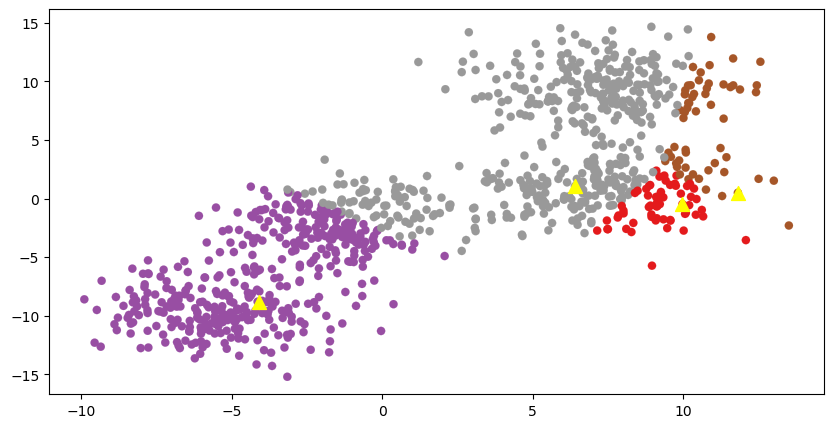

In [158]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],c=df['labels'],cmap=plt.cm.Set1,linewidths=0.1)

plt.scatter(centroids[:,0], centroids[:,1], marker='^', s=100,color='yellow')
plt.show()

Como vemos no ha funcionado de forma muy correcta, por lo que debemos de iterar de nuevo. Recordemos que este método (es decir, k-Means) es dependiente de la inicialización de los centroides iniciales, escogidos al azar.

#### 3. Recalculamos los centroides

In [159]:
#Calculamos los nuevos centroides como el valor medio del conjunto de puntos de cada cluster asignado en la primera iteración
centroids = df.groupby('labels')[features].mean().values

Visualizamos estos nuevos centroides. ¿Están mejor ubicados que los centroides iniciales aleatorios?

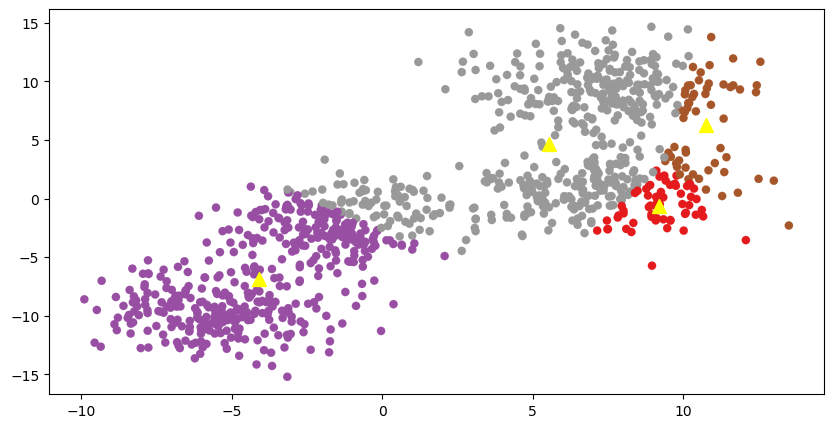

In [160]:
plt.figure(figsize=(10,5))
plt.scatter(df['x1'],df['x2'],c=df['labels'],cmap=plt.cm.Set1,linewidths=0.1)

plt.scatter(centroids[:,0], centroids[:,1], marker='^', s=100,color='yellow')
plt.show()

A continuación realiza los mismos pasos que hemos hecho hasta ahora, pero dentro de un bucle, que nos permita realizar varias iteraciones.

## K-Means scikit-learn

Tras realizar nuestra implementación del algoritmo k-Means de forma manual, vamos a calcular los clusters con la implementación del mismo de la librería scikit-learn, de modo que podamos comparar cómo de buena ha sido nuestro algoritmo.

In [161]:
#Inicializamos el algoritmo KMeans de sklearn con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1993)

In [162]:
#Ajustamos el modelo a nuestro conjunto de datos
kmeans.fit(df[features])

KMeans(n_clusters=4, random_state=1993)

In [163]:
#Añadimos las etiquetas de cluster a nuestro conjunto de datos
df['labels'] = kmeans.predict(df[features])

In [164]:
df.head()

,x1,x2,labels
0,8.422981,1.436159,1
1,5.518084,8.325260,3
2,-3.919422,0.722993,2
3,-6.137162,-9.758148,0
4,8.275729,-2.854448,1


In [165]:
#Obtenemos los centroides de los clusters asignados por k-Means
centroids = kmeans.cluster_centers_
centroids

array([[-5.4259234 , -9.58978864],
       [ 7.47339339,  0.76135263],
       [-1.39442231, -2.12135292],
       [ 7.41871355,  9.48172123]])

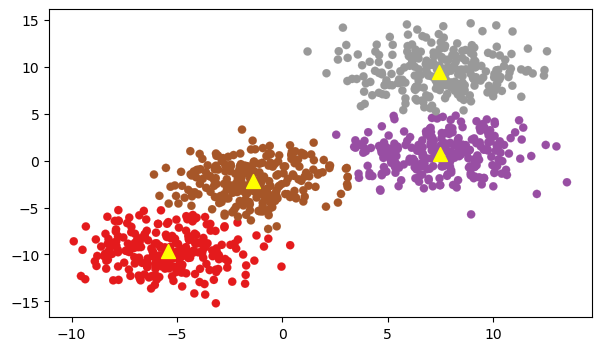

In [166]:
#Visualizamos los clusters y los centroides
plt.figure(figsize=(7,4))
plt.scatter(df['x1'],df['x2'],c=df['labels'],cmap=plt.cm.Set1,linewidths=0.1)

plt.scatter(centroids[:,0], centroids[:,1], marker='^', s=100,color='yellow')
plt.show()

Podemos comparar los clusters definidos por k-Means con los encontrados con nuestra implementación. ¿Se acercan más a este último si aumentamos el número de iteraciones de nuestra implementación? Haz la prueba y analiza como cambia.

## Importancia de la normalización

Como sabemos k-Means es un método basado en distancias y por tanto es sensible a la escala de las variables. Las variables con escalas más grandes pueden dominar la distancia euclidiana utilizada por K-Means, lo que puede hacer que el algoritmo dé más peso a esas variables en el proceso de clustering. Normalizar los datos garantiza que todas las variables tengan la misma influencia en el algoritmo de clustering.

#### 1. Clustering con datos sin normalizar

Utilizando los datos `clust_ex1.csv` realiza un kmeans con 4 clusters y grafica los aglomerados que obtienes.

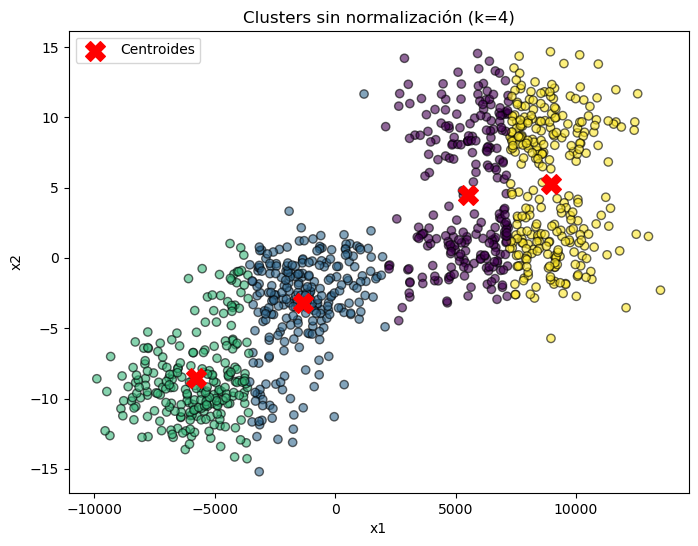

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Cargar los datos
df = pd.read_csv("clust_ex1.csv")

#Extracción de columnas x1 y x2
X = df[['x1', 'x2']]

#Creando el modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['cluster'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clusters sin normalización (k=4)')
plt.legend()
plt.show()

Calculamos la inercia. La inercia en el algoritmo K-Means se refiere a la suma de las distancias cuadradas de cada punto de datos al centroide de su cluster asignado.

$$\text{Inercia} = \sum_{i=1}^{n} \min_{\mu_j \in C} \|x_i - \mu_j\|^2$$

El objetivo del algoritmo es minimizar este valor. Se obtiene con el método `inertia_`de kmeans. Obtén este valor para el algoritmo que acabas de ejecutar.

In [168]:
inertia = kmeans.inertia_
inertia

1885404909.4188704

#### 2. Clustering con datos normalizados

Utilizando lo aprendido en la asignatura de Exploración de Datos normaliza los mismos con el objeto `MinMaxScaler()` y vuelve a ejecutar el algoritmo kMeans para 4 clusters. ¿Qué ocurre? Grafica el resultado. Obtén su Inercia para compararla con el valor obtenido anteriormente.

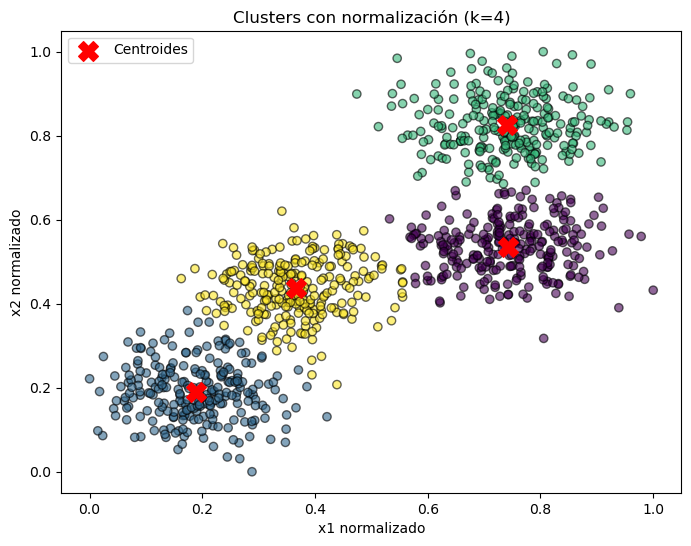

Modelo de inercia con normalización: 11.457334401938626


In [169]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

#Creando KMeans
kmeans_norm = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_normalized'] = kmeans_norm.fit_predict(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=df['cluster_normalized'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans_norm.cluster_centers_[:, 0], kmeans_norm.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('x1 normalizado')
plt.ylabel('x2 normalizado')
plt.title('Clusters con normalización (k=4)')
plt.legend()
plt.show()

#Calcular la inercia con normalización
inertia_normalized = kmeans_norm.inertia_
print(f"Modelo de inercia con normalización: {inertia_normalized}")


## Importancia de los *outliers*

Los outliers, al estar muy alejados del resto de los datos, pueden distorsionar la posición de los centroides de los clusters. Esto puede llevar a una asignación incorrecta de puntos de datos a clusters y a la formación de clusters no representativos de la estructura subyacente de los datos. Recordemos que K-Means es sensible a la inicialización de los centroides y la presencia de outliers puede influir en la elección de la ubicación inicial de los mismos.

Además, la presencia de outliers puede aumentar la inercia del clustering, ya que los outliers contribuyen significativamente a las distancias entre los puntos de datos y los centroides. Esto puede hacer que la inercia sea una medida menos confiable de la calidad del clustering, especialmente si hay un número considerable de outliers en los datos.

Por ello es importante que en este apartado analicemos de forma prática su influencia.

In [170]:
df = pd.read_csv('clust_ex2.csv')

In [171]:
#Creamos valores atípicos y los añadimos al conjunto de datos
df_outliers = pd.DataFrame({'x1': [100, 4, 103],'x2': [0, 52, 9]})
df = pd.concat([df, df_outliers])

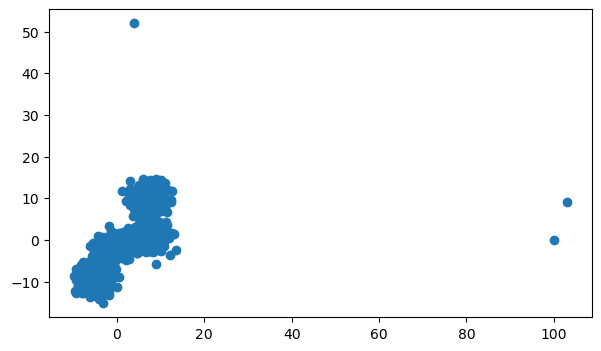

In [172]:
#Visualizamos los datos
plt.figure(figsize=(7,4))
plt.scatter(df['x1'],df['x2'])
plt.show()

Vemos como se visualiza en el gráfico superior un punto atípico en la parte superior del mismo, separado del resto de conjunto de datos.

Ejecuta k-Means para 4 clusters como en el caso anterior y analiza qué ocurre.

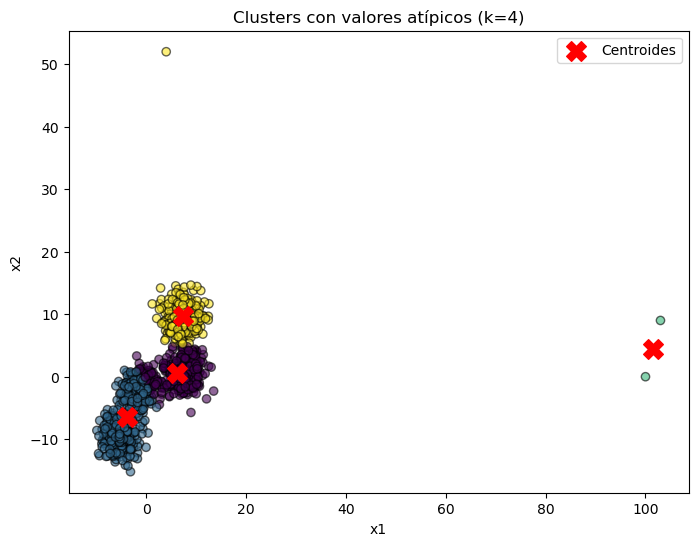

Inércia con valores atípicos: 17568.045374249705


In [173]:
#Creando un modelo KMeans considerando valores atípicos
X_outliers = df[['x1', 'x2']]
kmeans_outliers = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_outliers'] = kmeans_outliers.fit_predict(X_outliers)

#Trazar los clusters con outliers
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['cluster_outliers'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans_outliers.cluster_centers_[:, 0], kmeans_outliers.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clusters con valores atípicos (k=4)')
plt.legend()
plt.show()

#Calcular la inércia con outliers
inertia_outliers = kmeans_outliers.inertia_
print(f"Inércia con valores atípicos: {inertia_outliers}")

Podemos calcular también el coeficiente de la silueta El coeficiente de silueta es una medida de cuán similar es un punto a su propio cluster (cohesión) en comparación con otros clusters (separación). Es una medida de la calidad del clustering que asigna un valor entre -1 y 1 a cada punto de datos en función de su proximidad a los demás puntos de su cluster y a los puntos de otros clusters.
* Un valor cercano a 1 indica que el punto está bien ubicado en su cluster y está considerablemente separado de otros clusters, lo que sugiere una buena calidad de clustering.
* Un valor cercano a 0 indica que el punto está cerca del límite entre dos clusters, lo que sugiere una superposición o ambigüedad en la asignación de clusters.
* Un valor cercano a -1 indica que el punto puede haber sido asignado al cluster incorrecto, ya que está más cerca de los puntos de otros clusters que de los puntos de su propio cluster.

A continuación obtenemos el coeficiente medio de todos los puntos

In [174]:
silhouette_avg = silhouette_score(X_outliers, df['cluster_outliers'])
silhouette_avg

0.5248118182224425

Ahora selecciona el conjunto de datos original (sin este valor atípico), modela un kMeans de 4 clusters y observa qué grupos detecta el algoritmo. Calcula el valor de la Inercia y la Silueta y compáralo con los valores anteriores.

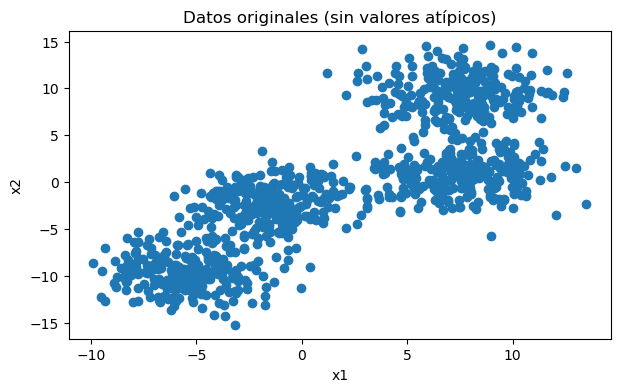

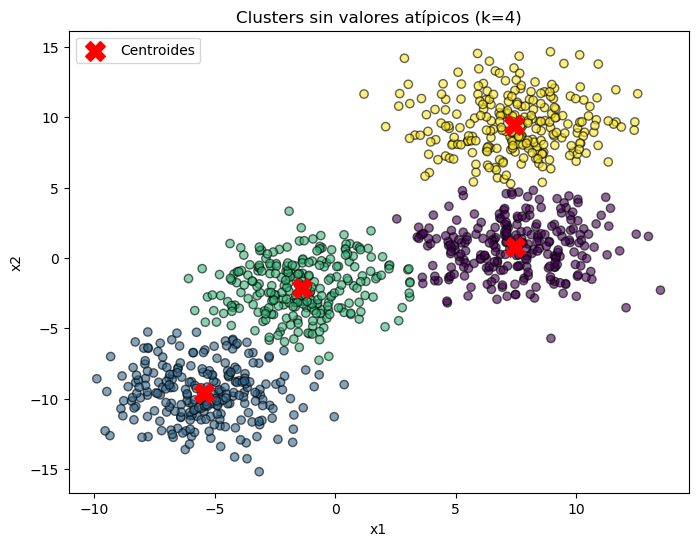

Inércia sin valores atípicos: 7719.459972991198
Coeficiente de silueta promedio (sin valores atípicos): 0.5687


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Cargar los datos
df = pd.read_csv('clust_ex2.csv')

#Ver los datos
plt.figure(figsize=(7, 4))
plt.scatter(df['x1'], df['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos originales (sin valores atípicos)')
plt.show()

#Crear KMeans
X_original = df[['x1', 'x2']]
kmeans_original = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_original'] = kmeans_original.fit_predict(X_original)

#Trazar los clusters detectados por el algoritmo
plt.figure(figsize=(8, 6))
plt.scatter(df['x1'], df['x2'], c=df['cluster_original'], cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Clusters sin valores atípicos (k=4)')
plt.legend()
plt.show()

#Calcular la inercia del modelo sin valores atípicos
inertia_original = kmeans_original.inertia_
print(f"Inércia sin valores atípicos: {inertia_original}")

#Calcular el coeficiente de silhueta
silhouette_original = silhouette_score(X_original, df['cluster_original'])
print(f"Coeficiente de silueta promedio (sin valores atípicos): {silhouette_original:.4f}")


## Encontrar el valor óptimo de k: Elbow method

Vimos en esta lección ciertas técnicas para poder saber que número de clusters son más adecuados para el conjunto de datos con el que estemos trabajando. Uno de ellos es *elbow method* o método del codo. Vamos utilizarlo para ver qué número es el mejor para nuestro primer conjunto de datos y en el caso de que sea necesario, repetir la clusterización.

In [176]:
df = pd.read_csv('clust_ex2.csv')

In [177]:
Ks = range(2, 10)

In [178]:
intertias = []

for k in Ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[features])
    intertias.append(kmeans.inertia_)

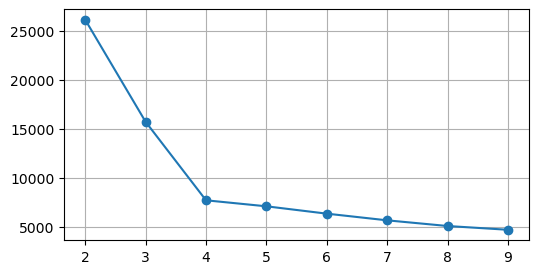

In [179]:
plt.figure(figsize=(6,3))

plt.plot(Ks, intertias, marker='o')
plt.grid()

plt.show()

Analizando el gráfico obtenido, ¿qué número de clusters es el óptimo?

4 clusters es el número óptimo.

# Extra

Los algoritmos de clusterización segmentan los datos en grupos o clases. Una vez que descubrimos las clases posibles con estas técnicas, podemos clasificar dentro de los mismos nuevas instancias de datos.
Es decir, es común que se utilicen técnicas no supervisadas para descubirir los patrones ocultos en los datos y así agrupar estos en clases, por ejemplo, grupos de clientes según su comportamiento. Una vez que conocemos los tipos de clientes que existen, podemos utilizar estos datos, etiquetados tras la clusterización, para entrenar un modelo de clasificación, y así poder clasificar a futuro un nuevo cliente.

Practica a entrenar un algoritmo de clasificación con los datos de esta práctica que hemos etiquetado después de la aplicación de k-Means con el conjunto de datos `clust_ex2.csv`y 4 clusters.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#Cargar los datos
df = pd.read_csv('clust_ex2.csv')

#Seleccione solo columnas numéricas para agrupar
features = df.select_dtypes(include=['number']).columns
X = df[features]

#Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

#Separar datos 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['cluster'], test_size=0.2, random_state=42, stratify=df['cluster'])

#Entrenar un modelo de clasificación (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#Evaluar el desempeño con validación cruzada
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Precisión promedio del clasificador: {np.mean(scores):.2f}')

#Pruebe el modelo con nuevos datos
sample = np.array([X_test[0]])
predicted_cluster = clf.predict(sample)
print(f'Los nuevos datos se clasificaron en el grupo.: {predicted_cluster[0]}')


Precisión promedio del clasificador: 1.00
Los nuevos datos se clasificaron en el grupo.: 2
